In [1]:
import requests
import bs4

In [2]:
# получить список товаров на сайте с ценами (на вход либо кол-во товаров, либо кол-во страниц)
def get_list_of_products(number_of_products=16, pages_total=None):
    cnt = 0
    if not pages_total:
        pages_total = number_of_products // 15 + 1 # на каждой странице 15 товаров 
    else:
        number_of_products = pages_total * 15

    for page_number in range(1, pages_total+1):
        print(f"Page number: {page_number}")
        resp = requests.get(f'https://agami.moscow/shop/page/{page_number}/')
        soup = bs4.BeautifulSoup(resp.content, 'html.parser')
        prodlist = soup.find_all("div", class_="prodlist prodlist--shop")

        for index, product in enumerate(prodlist[0].find_all("div", "prodlist__item")):
            titles = product.findAll("i")
            # print(titles)
            for title in titles:
                name = title.contents[0] # наименование товара
                price = title.findAll('bdi')[0].text # цена
                print(f'{index+1: >2}. {name}, {price}')

            cnt += 1 
            if cnt == number_of_products:
                break
        print()

In [3]:
number_of_products = 16
get_list_of_products(number_of_products)

Page number: 1
 1. Миска из темного шамота бирюзовая ровный край, 1 300 ₽
 2. Набор из 4 синих тарелок "Seafruit", 26 см, 5 200 ₽
 3. Набор из 4 тарелок "Дюна", 26 см, 5 200 ₽
 4. Кружка "Банановый милкшейк", 1 700 ₽
 5. Набор из 4 тарелок "Горчица", 26 см, 6 000 ₽
 6. Набор из 4 тарелок "Далматин", 26 см, 6 000 ₽
 7. Набор из 4 тарелок "Синичка", 20 см, 4 400 ₽
 8. Набор из 4 тарелок "Горчица", 20 см, 4 400 ₽
 9. Набор из 4 синих тарелок Seafruit, 20 см, 4 400 ₽
10. Набор из 4 белых тарелок Seafruit, 20 см, 4 400 ₽
11. Набор из 4 тарелок "Дюна", 20 см, 4 400 ₽
12. Чайник "Конфетти", 3 000 ₽
13. Салатник "Конфетти", 3 500 ₽
14. Кружка "Дюна", 550 мл, 1 800 ₽
15. Набор из трех баночек х Recycle Object черно-белый, 3 500 ₽

Page number: 2
 1. Набор из 4 глубоких тарелок "Дюна", 6 500 ₽



In [4]:
get_list_of_products(pages_total=2)

Page number: 1
 1. Миска из темного шамота бирюзовая ровный край, 1 300 ₽
 2. Набор из 4 синих тарелок "Seafruit", 26 см, 5 200 ₽
 3. Набор из 4 тарелок "Дюна", 26 см, 5 200 ₽
 4. Кружка "Банановый милкшейк", 1 700 ₽
 5. Набор из 4 тарелок "Горчица", 26 см, 6 000 ₽
 6. Набор из 4 тарелок "Далматин", 26 см, 6 000 ₽
 7. Набор из 4 тарелок "Синичка", 20 см, 4 400 ₽
 8. Набор из 4 тарелок "Горчица", 20 см, 4 400 ₽
 9. Набор из 4 синих тарелок Seafruit, 20 см, 4 400 ₽
10. Набор из 4 белых тарелок Seafruit, 20 см, 4 400 ₽
11. Набор из 4 тарелок "Дюна", 20 см, 4 400 ₽
12. Чайник "Конфетти", 3 000 ₽
13. Салатник "Конфетти", 3 500 ₽
14. Кружка "Дюна", 550 мл, 1 800 ₽
15. Набор из трех баночек х Recycle Object черно-белый, 3 500 ₽

Page number: 2
 1. Набор из 4 глубоких тарелок "Дюна", 6 500 ₽
 2. Набор из 4 глубоких тарелок "Синичка", 6 500 ₽
 3. Набор из 4 глубоких тарелок "Далматин", 6 500 ₽
 4. Набор из 4 мисок "Горчица", 4 500 ₽
 5. Набор из 4 мисок "Далматин", 4 500 ₽
 6. Набор из 4 мисок 

In [5]:
from IPython.display import Image, display

# вывести товар
def print_product_details(full_name, page_number=1):
    # парсим страницу
    resp = requests.get(f'https://agami.moscow/shop/page/{page_number}/')
    soup = bs4.BeautifulSoup(resp.content, 'html.parser')

    # ищем ссылку на товар 
    div = soup.find_all(string=full_name)[0].parent.parent.parent
    link = div.findAll('a')[0].get('href')

    # переход по ссылке
    product_resp = requests.get(link)
    product_page = bs4.BeautifulSoup(product_resp.content, 'html.parser')

    # парим информацию о товаре
    product_name = product_page.findAll('h1')[0].text
    product_price = product_page.findAll('bdi')[0].text # в int - product_price[0].replace(" ", '')
    img_link = product_page.findAll('img')[0].get('src')

    product_weight = product_page.findAll('dl')[0].findAll('dd')[0].text
    product_size = product_page.findAll('dl')[0].findAll('dd')[1].text
    product_care = product_page.findAll('dl')[0].findAll('dd')[2].text.strip()
    product_compound = product_page.findAll('dl')[0].findAll('dd')[3].text.strip()

    # извлекаем картинку
    img_resp = requests.get(img_link)

    display(Image(img_resp.content, width=300))
    print(product_name)
    print(f"Цена:    {product_price:}")
    print(f"Вес:     {product_weight}")
    print(f"Размер:  {product_size}")
    print(f"Уход:    {product_care}")
    print(f"Состав:  {product_compound}")

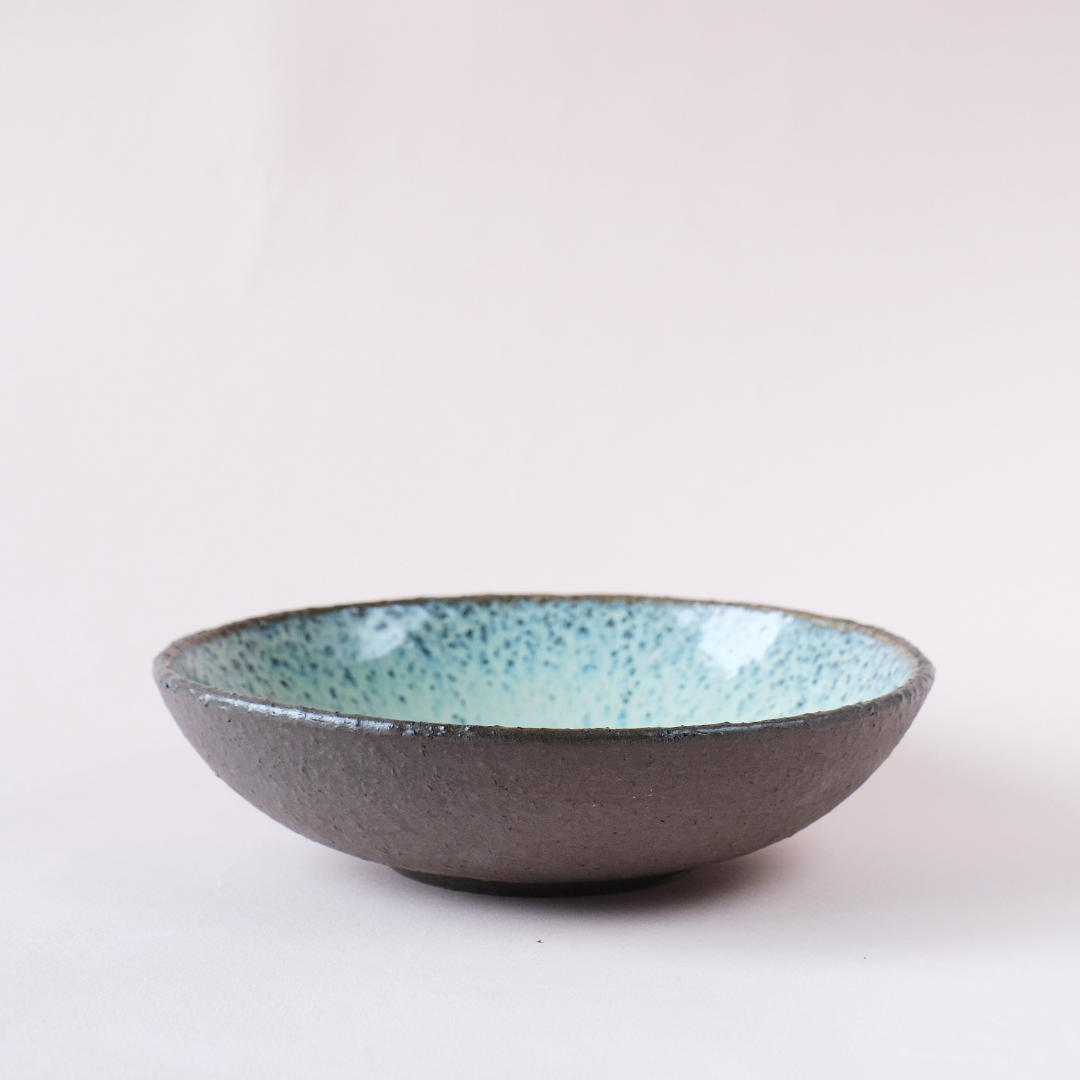

Миска из темного шамота бирюзовая ровный край
Цена:    1 300 ₽
Вес:     450 г
Размер:  18 × 18 × 5 cm
Уход:    Можно мыть в посудомоечной машине и греть в микроволновой печи
Состав:  шамот, пищевые глазури


In [6]:
# перейти на страницу товара и получить информацию о нем
full_name = "Миска из темного шамота бирюзовая ровный край"

print_product_details(full_name)

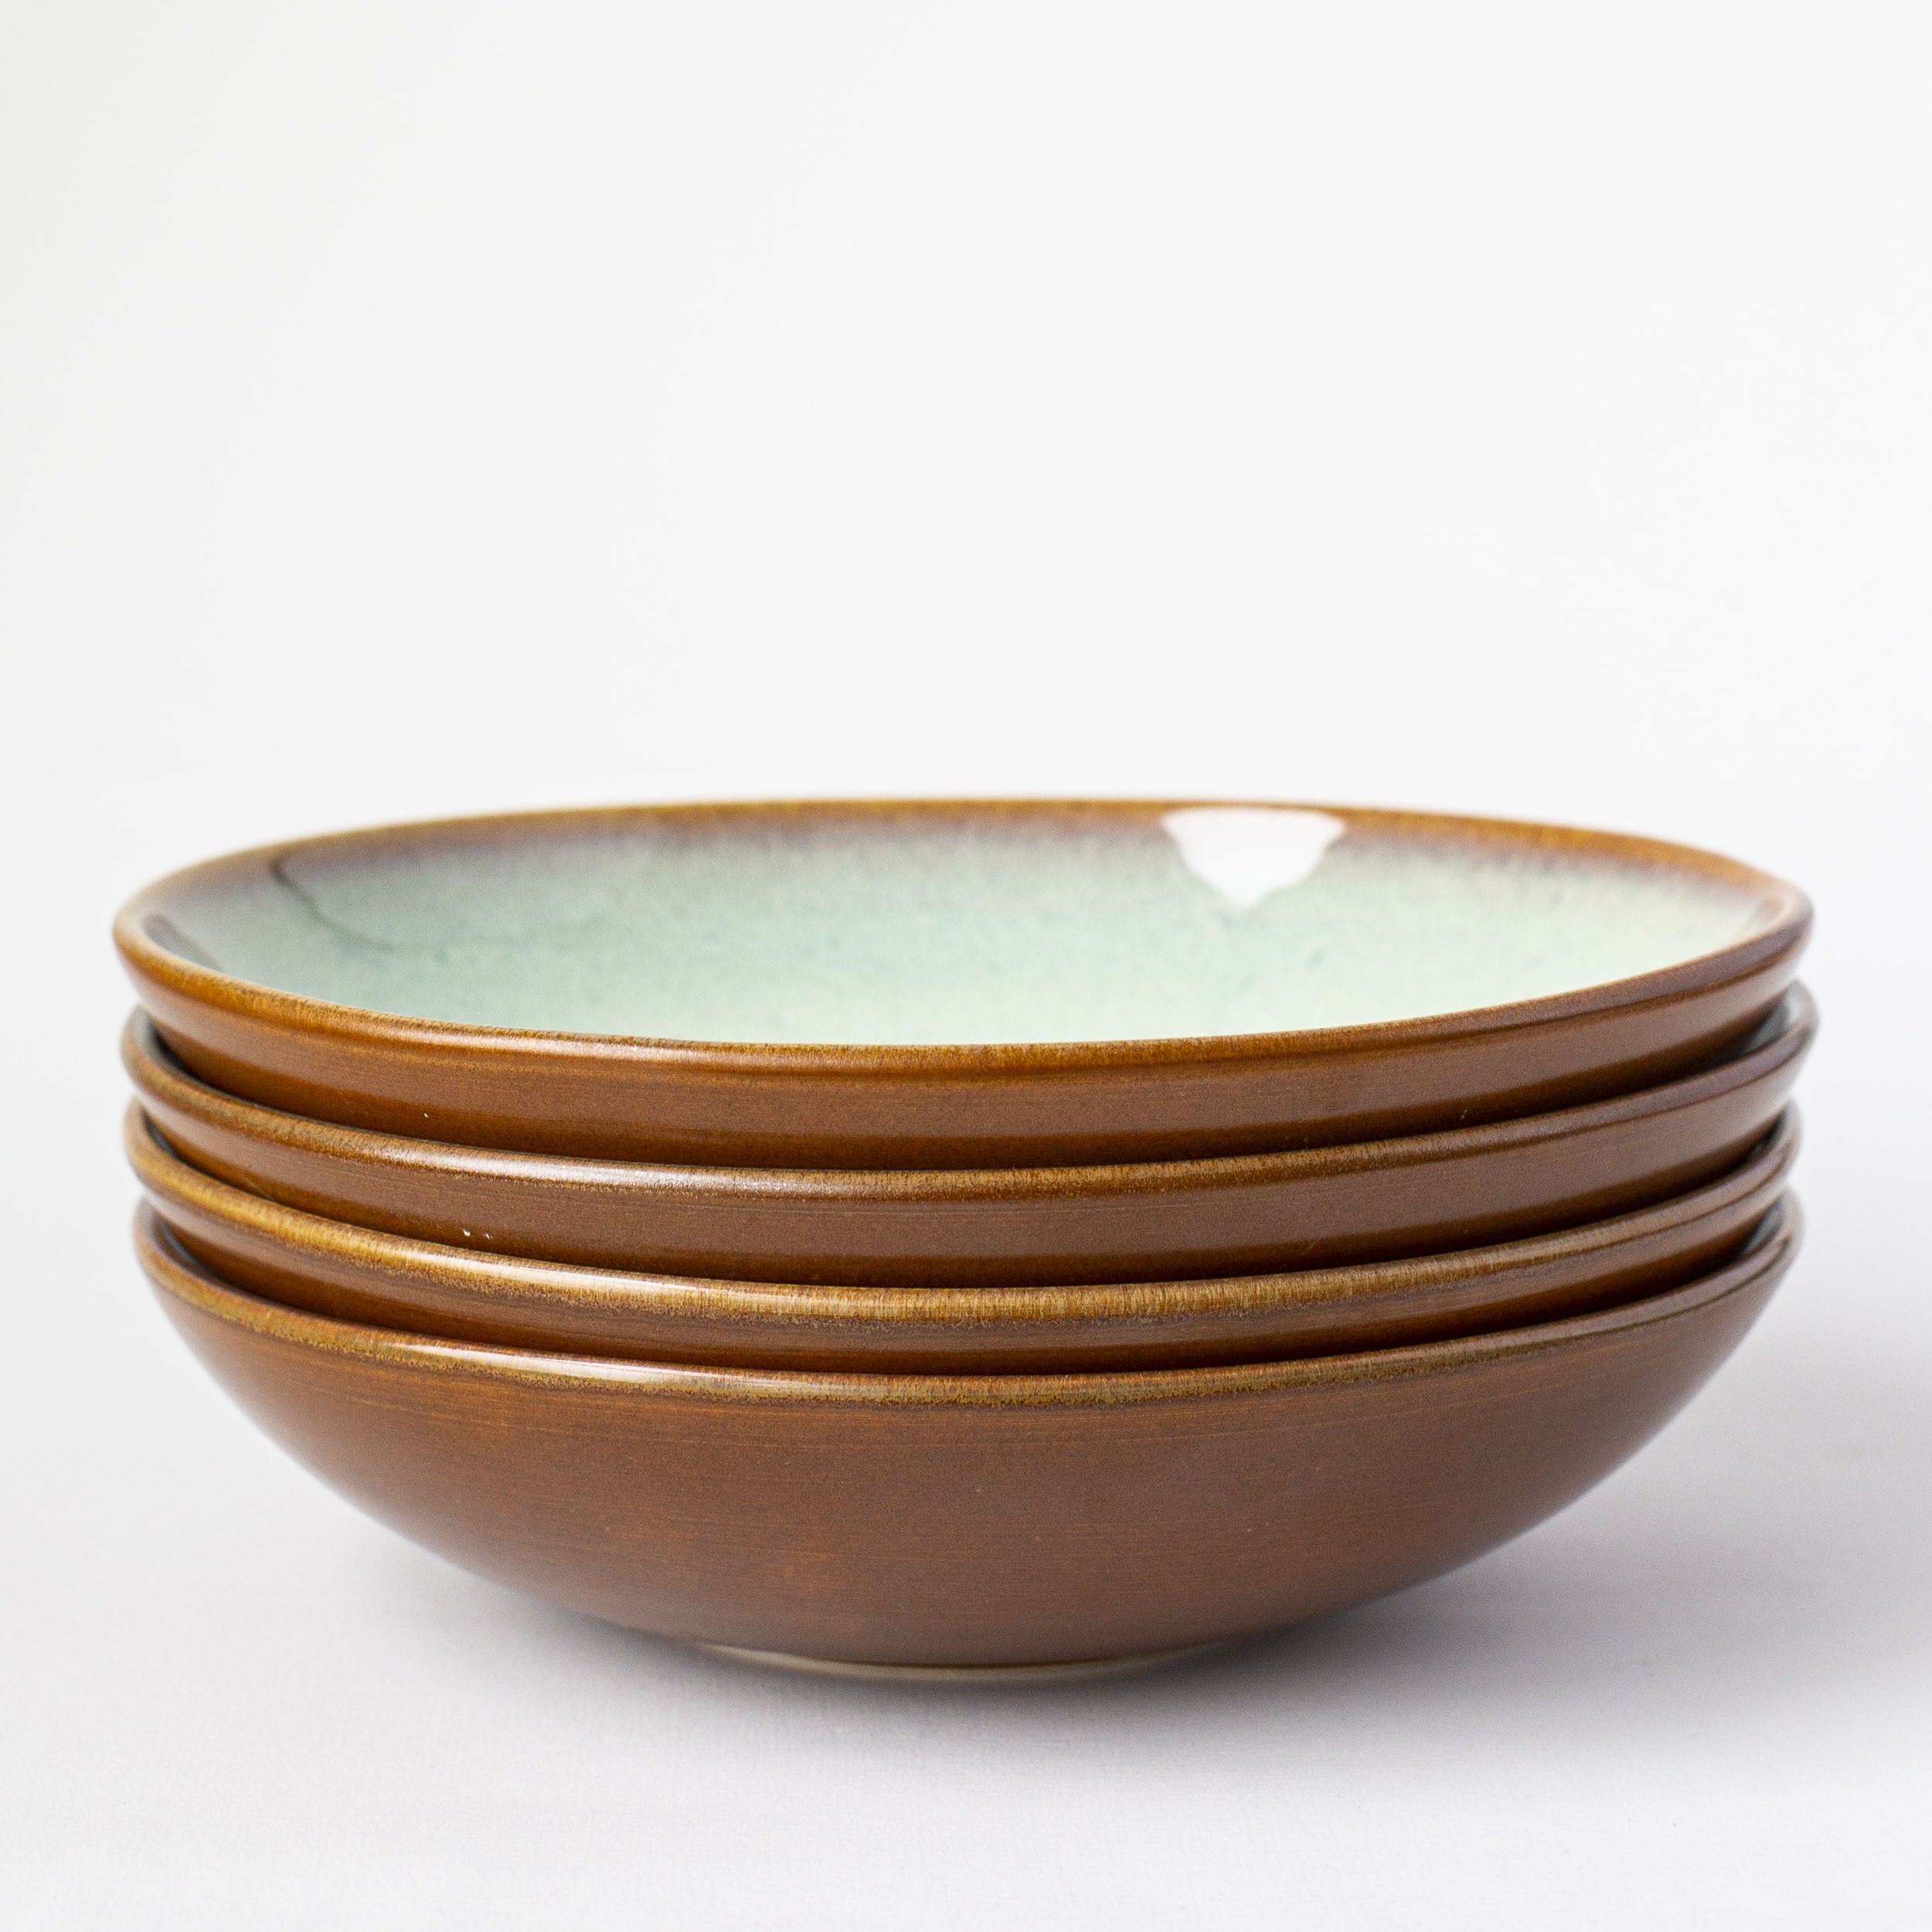

Набор из 4 глубоких тарелок “Дюна”
Цена:    6 500 ₽
Вес:     2800 г
Размер:  26 × 26 × 15 cm
Уход:    Можно мыть в посудомоечной машине и использовать в микроволновой печи.
Состав:  полуфарфор, пищевые глазури


In [7]:
full_name = 'Набор из 4 глубоких тарелок "Дюна"'
print_product_details(full_name, page_number=2)